Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
Summer | AY 2024 - 2025
<hr> | <hr>
<u>**Assignment 5.2**</u> | <u>**Build and Apply Multilayer Perceptron**</u>
**Name** | Calvadores, Kelly Joseph
**Section** | CPE32S1
**Date Performed**: | June 22, 2024
**Date Submitted**: | June 23, 2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#Part 1: Try the MLP Notebook using the CIFAR10 Keras Dataset

##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

##Loading Dataset

In [ ]:
CifarData = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


##Convert them into float values

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

##Normalize the data by dividing 255

In [ ]:
grayscale = 255
x_train /= grayscale
x_test /= grayscale

##Create the model form

In [ ]:
CifarModel = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

##Compile the Model

In [ ]:
CifarModel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

##Fit the Model

In [ ]:
CifarModel.fit(x_train, y_train, epochs=10,
               batch_size = 2000,
               validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 8s 308ms/step - loss: 2.5125 - accuracy: 0.1694 - val_loss: 2.0674 - val_accuracy: 0.2654
Epoch 2/10
20/20 [==============================] - 7s 354ms/step - loss: 1.9926 - accuracy: 0.2914 - val_loss: 1.9521 - val_accuracy: 0.3092
Epoch 3/10
20/20 [==============================] - 6s 326ms/step - loss: 1.8915 - accuracy: 0.3355 - val_loss: 1.8929 - val_accuracy: 0.3300
Epoch 4/10
20/20 [==============================] - 8s 418ms/step - loss: 1.8488 - accuracy: 0.3458 - val_loss: 1.8578 - val_accuracy: 0.3306
Epoch 5/10
20/20 [==============================] - 6s 281ms/step - loss: 1.7978 - accuracy: 0.3643 - val_loss: 1.8004 - val_accuracy: 0.3613
Epoch 6/10
20/20 [==============================] - 7s 370ms/step - loss: 1.7480 - accuracy: 0.3839 - val_loss: 1.7776 - val_accuracy: 0.3746
Epoch 7/10
20/20 [==============================] - 6s 280ms/step - loss: 1.7237 - accuracy: 0.3925 - val_loss: 1.7436 - val_accuracy: 0.3881
Epoch 

## Find the accuracy of the Model

In [ ]:
CifarResults = CifarModel.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', CifarResults)

313/313 [==============================] - 2s 6ms/step - loss: 1.6583 - accuracy: 0.4091
test loss, test acc: [1.6583114862442017, 0.4090999960899353]


#Part 2:

##Choose any dataset

###Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

###Loading Dataset

Resource: https://archive.ics.uci.edu/dataset/19/car+evaluation

In [29]:
ColumnNames = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
CarData = pd.read_csv('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 5.2/car.data', header=None)
CarData.columns = ColumnNames
CarData.to_csv('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 5.2/data_with_header.csv', index=False)
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [30]:
CarData

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##Explain the problem you are trying to solve

- The problem that is trying to solve is to determine the condition of the vehicles, wether it has an accident history or the remaining lifespan, also categorizing cars into various classes based on features. The goal is to develop a system that determining the Car evaluation with such giving description.

##Create your own model

In [31]:
CarData.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


###Convert all rows into int values

In [32]:
LE = LabelEncoder()
for col in CarData.columns:
    if CarData[col].dtype == 'object':
      CarData[col] = LE.fit_transform(CarData[col])
    else:
      pass
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [33]:
CarData

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [34]:
CarData.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


###Splitting X and y values

In [35]:
X = CarData.iloc[:, :-1].values
y = CarData.iloc[:, -1].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

###Standardizing the X_train and X_test variables

In [38]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

###Displaying the shape of X and y split

In [39]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (1296, 6)
Target matrix: (432, 6)
Feature matrix: (1296,)
Target matrix: (432,)


###Creating Model

In [71]:
CarDataModel = Sequential([
        Flatten(input_shape=(6,)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(5, activation='softmax')
])

###Summary the Model

In [72]:
CarDataModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 6)                 0         
                                                                 
 dense_24 (Dense)            (None, 512)               3584      
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 136197 (532.02 KB)
Trainable params: 136197 (532.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compile the Model

In [73]:
CarDataModel.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

###Fit the Model

In [83]:
history = CarDataModel.fit(X_train, y_train, epochs=20,
                 batch_size = 2000,
                 validation_split = 0.2)

Epoch 1/20
1/1 [==============================] - 0s 118ms/step - loss: 0.4258 - accuracy: 0.8427 - val_loss: 0.4092 - val_accuracy: 0.8077
Epoch 2/20
1/1 [==============================] - 0s 77ms/step - loss: 0.4182 - accuracy: 0.8456 - val_loss: 0.4023 - val_accuracy: 0.8154
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 0.4107 - accuracy: 0.8475 - val_loss: 0.3954 - val_accuracy: 0.8192
Epoch 4/20
1/1 [==============================] - 0s 74ms/step - loss: 0.4033 - accuracy: 0.8494 - val_loss: 0.3884 - val_accuracy: 0.8308
Epoch 5/20
1/1 [==============================] - 0s 78ms/step - loss: 0.3959 - accuracy: 0.8533 - val_loss: 0.3814 - val_accuracy: 0.8423
Epoch 6/20
1/1 [==============================] - 0s 76ms/step - loss: 0.3885 - accuracy: 0.8571 - val_loss: 0.3743 - val_accuracy: 0.8538
Epoch 7/20
1/1 [==============================] - 0s 86ms/step - loss: 0.3812 - accuracy: 0.8591 - val_loss: 0.3673 - val_accuracy: 0.8538
Epoch 8/20
1/1 [==========

In [81]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

###Plot the Result of the Model

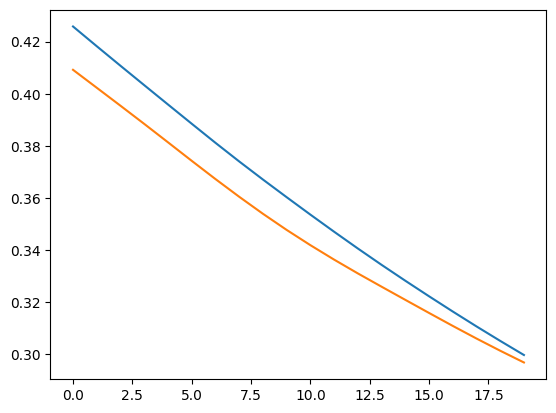

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

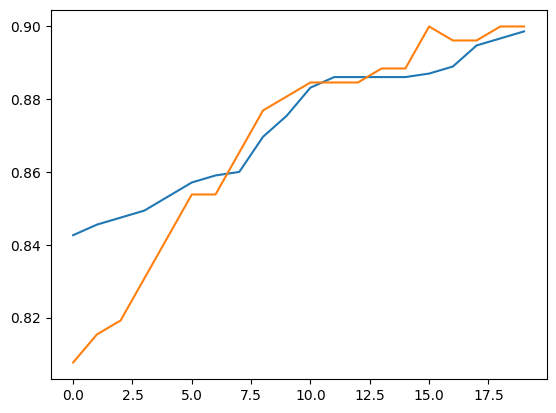

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

##Evaluate the accuracy of your model

In [90]:
CarDataResults = CarDataModel.evaluate(X_test, y_test, verbose = 1)
print('test loss, test acc:', CarDataResults)

14/14 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8819
test loss, test acc: [0.32595106959342957, 0.8819444179534912]


- The Accuracy that we have got in the model is 88.19% with a loss of 32.4%

In [ ]:
!jupyter nbconvert --to html /content/Assignment_5_2.ipynb

[NbConvertApp] Converting notebook /content/Assignment_5_2.ipynb to html
[NbConvertApp] Writing 595952 bytes to /content/Assignment_5_2.html


In [ ]:
!pandoc Assignment_5_2.html -s -o Assignment_5_2.docx